In [1]:
import pandas as pd
f1 = pd.read_csv('animelists.csv')
f2 = pd.read_csv('anime.csv')

In [2]:
f3 = pd.read_csv('users.csv')
header1 = f1.columns.values.tolist()
header2 = f2.columns.values.tolist()
header3 = f3.columns.values.tolist()

In [10]:
print(header2)

['anime_id', 'title', 'title_english', 'title_japanese', 'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status', 'airing', 'aired_string', 'aired', 'duration', 'rating', 'score', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background', 'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre', 'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year']


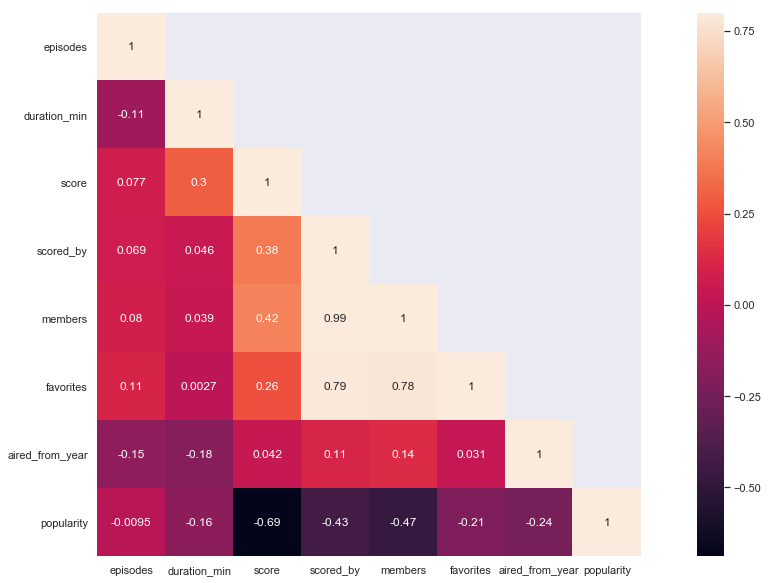

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
correlation = f2[['episodes', 'duration_min','score', 'scored_by','members','favorites','aired_from_year','popularity']].corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
mask =  np.array(correlation)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(correlation, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

In [15]:
print(header1)

['username', 'anime_id', 'my_watched_episodes', 'my_start_date', 'my_finish_date', 'my_score', 'my_status', 'my_rewatching', 'my_rewatching_ep', 'my_last_updated', 'my_tags']


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rew = f1[pd.notnull(f1['my_rewatching'])]

In [5]:
rew_anime_id = rew['anime_id'].value_counts().index.tolist()
rew_anime_times = rew['anime_id'].value_counts().tolist()

In [46]:
genrelist = []
stats = []
for i in range(len(rew_anime_id)):
    genre = f2[f2['anime_id']==rew_anime_id[i]]['genre'].tolist()[0]
    if isinstance(genre,str):
        genre = genre.split(', ')
    else:
        continue
    for x in genre:
        if x in genrelist:
            stats[genrelist.index(x)] += rew_anime_times[i]
        else:
            stats.append(rew_anime_times[i])
            genrelist.append(x)

In [56]:
cd = []
for i in range(len(stats)):
    cd.append([stats[i],genrelist[i]])
cd.sort(reverse=True)

In [107]:
cdmodify = cd[0:9]
q = 0
for i in range(9,len(cd)):
    q += cd[i][0]
cdmodify.append([q,'Others'])
size = [cdmodify[i][0] for i in range(10)]
labels = [cdmodify[i][1] for i in range(10)]

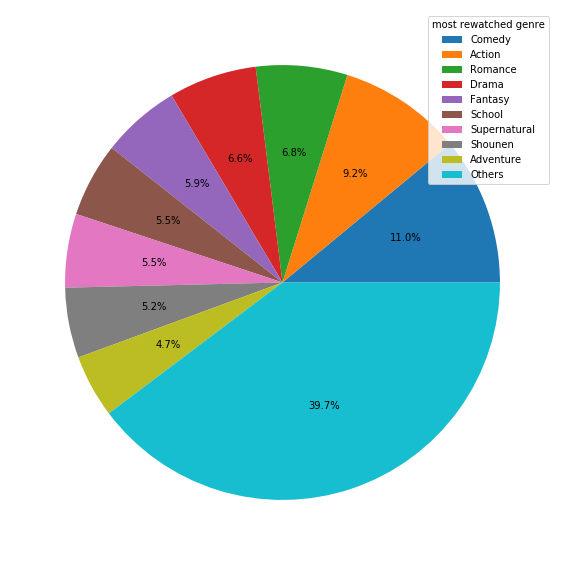

In [108]:
plt.figure(figsize =(10,10))
plt.pie(size,autopct = '%3.1f%%')
plt.legend(labels, title = 'most rewatched genre',loc='upper right')